INTRODUCTION TO MNIST
---

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import seaborn as sns 
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.datasets import fetch_openml
raw_data, raw_labels = fetch_openml('mnist_784', version=1, return_X_y=True)

In [ ]:
print(raw_data.shape)
print(np.max(raw_data))
print(np.unique(raw_labels))

(70000, 784)
pixel1       0.0
pixel2       0.0
pixel3       0.0
pixel4       0.0
pixel5       0.0
            ... 
pixel780    62.0
pixel781     0.0
pixel782     0.0
pixel783     0.0
pixel784     0.0
Length: 784, dtype: float64
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


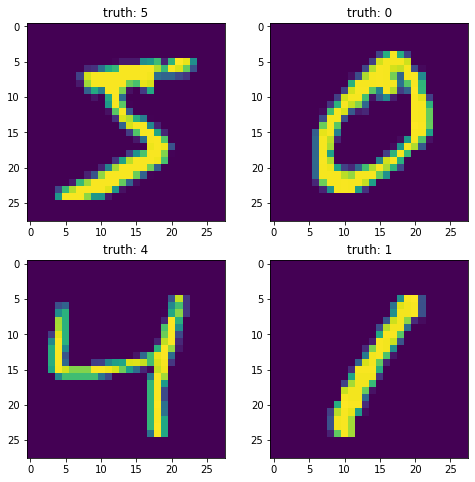

In [ ]:
nsamples = 5000
data = raw_data[:nsamples]
labels = raw_labels[:nsamples]

#selecting a subset of data by sampling, as 70k is too many data points

data = data / 255.
labels = labels.astype('int')
images = data.values.reshape(data.shape[0], 28, 28)

#here we normalise the greyscale levels

plt.figure(figsize=(8,8))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i])
    plt.title('truth: {}'.format(labels[i]))

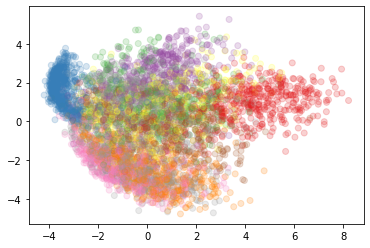

In [ ]:
from sklearn.decomposition import PCA as RandomizedPCA
pca = RandomizedPCA(n_components=2)
view = pca.fit_transform(data)
plt.scatter(view[:,0], view[:,1], c=labels, alpha=0.2, cmap='Set1')

In [ ]:
from sklearn.manifold import TSNE
view = TSNE(n_components=2, random_state=123).fit_transform(data)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0, 0.5, 't-SNE-2')

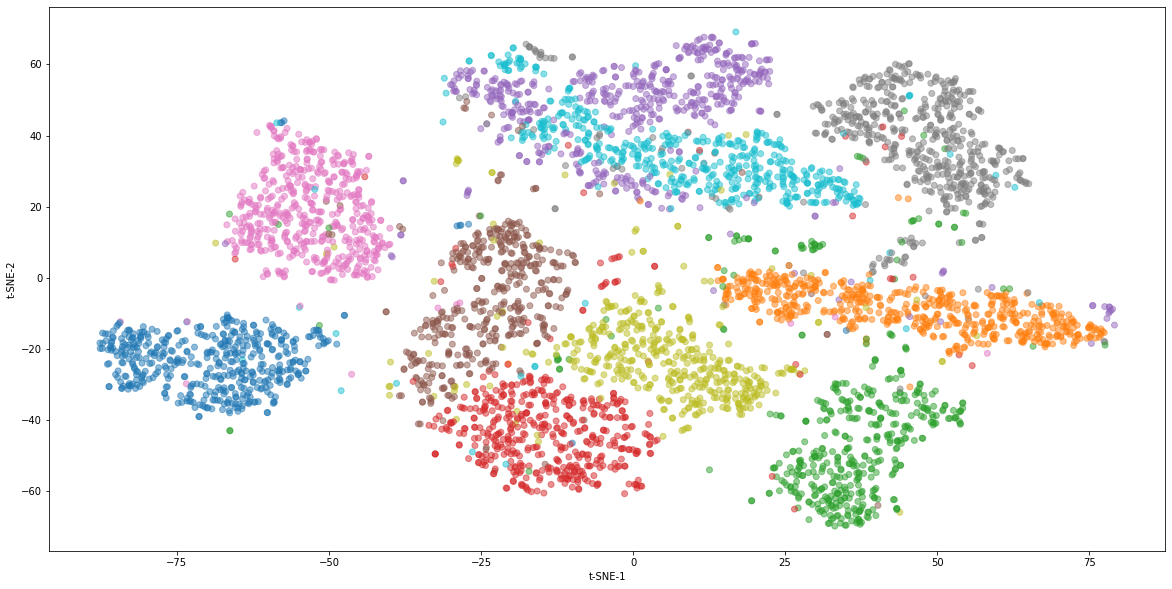

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(view[:,0], view[:,1], c=labels, alpha=0.5, cmap ='tab10')
plt.xlabel('t-SNE-1')
plt.ylabel('t-SNE-2')

The 10 manyfolds corresponding to the digit categories are well separated by the transformation. But two classes remain intricated at the top - 4 and 9. This is consistent with the confusion matrix presented later, which tells us that 4 and 9 are commonly misclassified as each other.

In [ ]:
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
output_notebook()

import pandas as pd
df = pd.DataFrame(view, columns=['x','y'])
df['label'] = labels.astype('str')
df

,x,y,label
0,-17.927973,-11.346171,5
1,-64.346489,-28.244583,0
2,-18.281961,55.362076,4
3,68.949509,-10.120345,1
4,3.515827,29.589228,9
...,...,...,...
4995,57.358746,33.064102,7
4996,-4.951775,-52.813423,3
4997,34.818043,-48.943794,2
4998,40.530838,-5.566920,1


This step allows us to hover on the points and gives us information on which digit is being classified.

In [ ]:
from bokeh.models import HoverTool
hover = HoverTool(
    tooltips = [('label','@label'),
               ('index', '$index')]
)

# create figure
fig_scat = figure(tools=[hover, 'box_zoom', 'crosshair', 'undo'], 
                  plot_width=600)

# bokeh data source from the dataframe
source = ColumnDataSource(df)

# color definition
from bokeh.transform import linear_cmap
from bokeh.palettes import d3
from bokeh.models import CategoricalColorMapper
palette = d3['Category10'][10]
cmap = CategoricalColorMapper(
    factors=df['label'].unique(),
    palette=palette
)

# scatter plot in figure
fig_scat.scatter(
    x='x', y='y', alpha=0.5, 
    color={'field': 'label', 'transform': cmap}, 
    source=source
)

# display below
show(fig_scat)

In [ ]:
test = np.loadtxt("/content/sample_data/mnist_test.csv",
                 delimiter=",", dtype=int)
train = np.loadtxt("/content/sample_data/mnist_train_small.csv",
                 delimiter=",", dtype=int)
print(test.shape)
print(train.shape)

(10000, 785)
(20000, 785)


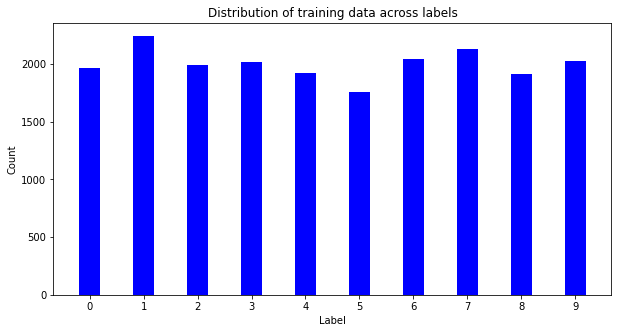

In [ ]:
counts = [0 for i in range(10)]
for i in range(len(train)):
  counts[train[i][0]] += 1
# print(counts)
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(['0','1','2','3','4','5','6','7','8','9'], counts, color ='blue',
        width = 0.4)
 
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of training data across labels")
plt.show()

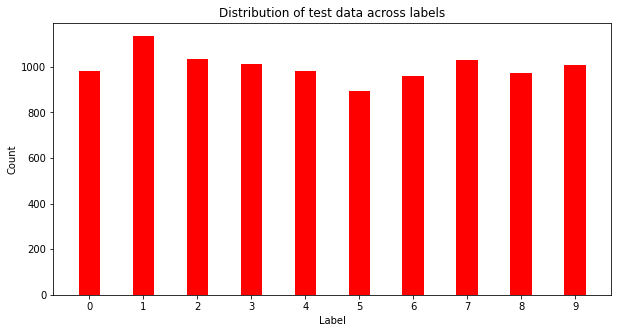

In [ ]:
counts = [0 for i in range(10)]
for i in range(len(test)):
  counts[test[i][0]] += 1
# print(counts)
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(['0','1','2','3','4','5','6','7','8','9'], counts, color ='red',
        width = 0.4)
 
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of test data across labels")
plt.show()

From the above graphs we can see that the testing and training data is quite spread out.

In [ ]:
x_train = []
y_train = []
x_test = []
y_test = []
for i in range(len(train)):
  y_train.append(train[i][0])
  x_train.append(train[i][1:])
x_train = np.array(x_train)
y_train = np.array(y_train)
# y_train
for i in range(len(test)):
  y_test.append(test[i][0])
  x_test.append(test[i][1:])
x_test = np.array(x_test)
y_test = np.array(y_test)

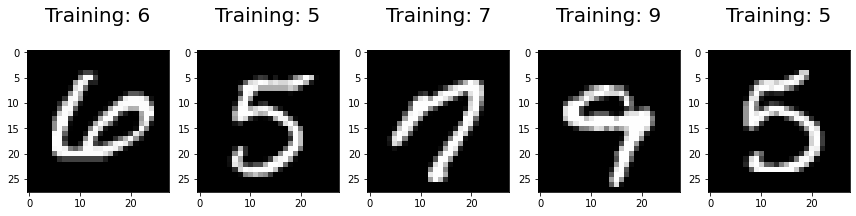

In [ ]:
plt.figure(figsize=(30,15))
for index, (image, label) in enumerate(zip(x_train[0:5], y_train[0:5])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

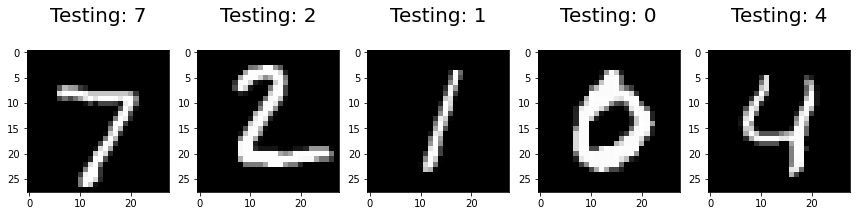

In [ ]:
plt.figure(figsize=(30,15))
for index, (image, label) in enumerate(zip(x_test[0:5], y_test[0:5])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Testing: %i\n' % label, fontsize = 20)


LOGISTIC REGRESSION
---



In [ ]:
logisticRegr = LogisticRegression(solver = 'sag', max_iter = 25)
logisticRegr.fit(x_train, y_train)
# Make predictions on entire test data
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
# print(score)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


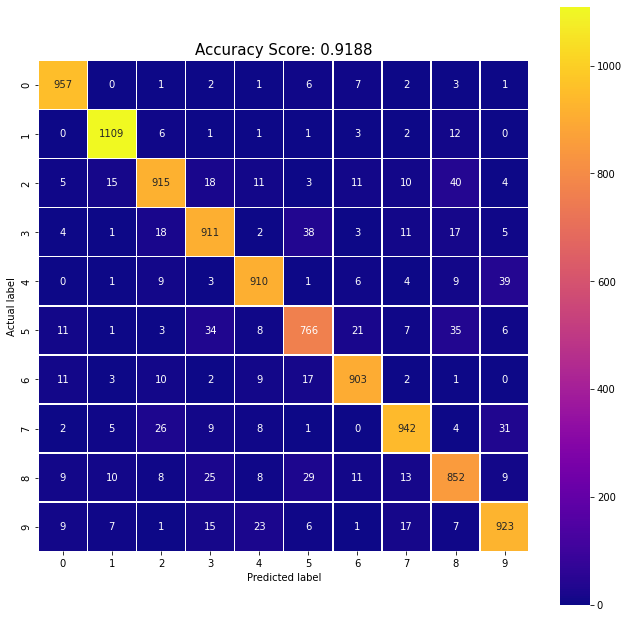

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(11,11))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'plasma');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show()

Our accuracy is 91.88%. We could have improved the accuracy by increasing the max iterations the algorithm runs for so that it has more iterations to find a better local optimum. However, the issue with that is that small changes to this number were not giving us big enough results and increasing the iterations beyond a certain point didn't make sense when running it on our less than powerful laptops. We have prioritized runtime over accuracy here. Furthermore, we used the sag solver to minimise the loss function as it is the best for large datasets.

In [ ]:
# !pip install mlxtend --upgrade
from mlxtend.evaluate.bias_variance_decomp import bias_variance_decomp

mse, bias, var = bias_variance_decomp(logisticRegr, x_train, y_train, x_test, y_test, loss='mse', num_rounds=15, random_seed=1)

# print('MSE: %.3f' % mse)
# print('Bias-squared: %.3f' % bias)
# print('Variance: %.3f' % var)

In [ ]:
print('MSE: %.3f' % mse)
print('Bias-squared: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 1.528
Bias-squared: 1.106
Variance: 0.422


Mean squared error (MSE) measures the amount of error in statistical models. It assesses the average squared difference between the observed and predicted values. When a model has no error, the MSE equals zero.

Bias is the simplifying assumptions made by the model to make the target function easier to approximate.

Variance is the variability in the model prediction—how much the ML function can adjust depending on the given data set. Variance comes from highly complex models with a large number of features.

Models with high bias will have low variance. Models with high variance will have a low bias.

As shown by our logistic regression model, simple models like it tend to have a higher bias and smaller variance


DECISION TREE
---



In [ ]:
tree = DecisionTreeClassifier(random_state = 32)
tree.fit(x_train, y_train)

# Make predictions on entire test data
predictions = tree.predict(x_test)
score = tree.score(x_test, y_test)
print(score)

0.8404


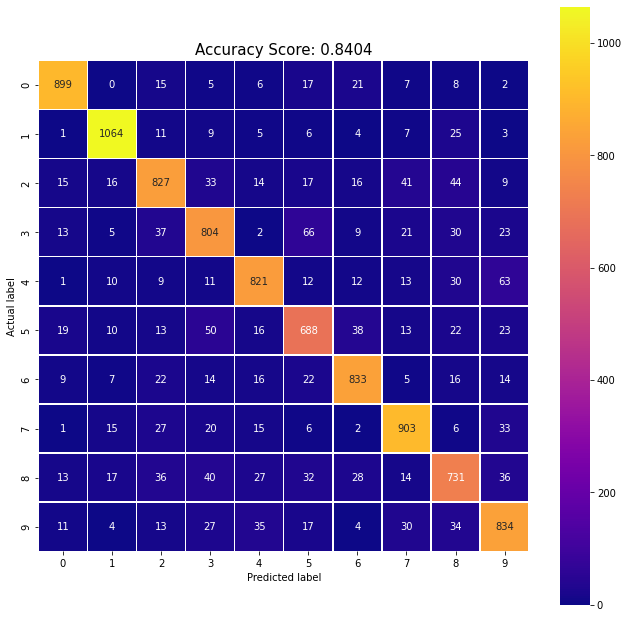

<Figure size 432x288 with 0 Axes>

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(11,11))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'plasma');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show()
plt.savefig("confusion.png")

In [ ]:
#%pip install mlxtend --upgrade
from mlxtend.evaluate.bias_variance_decomp import bias_variance_decomp

mse, bias, var = bias_variance_decomp(
        tree, x_train, y_train, x_test, y_test, 
        loss='mse', num_rounds = 25,
        random_seed=123)

print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 2.966
Bias: 1.075
Variance: 1.891


Mean squared error (MSE) measures the amount of error in statistical models. It assesses the average squared difference between the observed and predicted values. When a model has no error, the MSE equals zero.

Bias is the simplifying assumptions made by the model to make the target function easier to approximate.

Variance is the variability in the model prediction—how much the ML function can adjust depending on the given data set. Variance comes from highly complex models with a large number of features.

Models with high bias will have low variance. Models with high variance will have a low bias.

As shown by our decision tree model, complex models like it tend to have a higher bias and smaller variance

In [ ]:
#Checking for colourblind-friendliness
!pip install colorblind
import cv2
from colorblind import colorblind
import matplotlib.pyplot as plt

img = cv2.imread('/content/confusion.png')
img = img[..., ::-1]

# simulate protanopia
simulated_img = colorblind.simulate_colorblindness(img, colorblind_type='protanopia')
print(simulated_img)


K-NEAREST NEIGHBORS
---



In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
predictions = neigh.predict(x_test)
score = neigh.score(x_test, y_test)
print(score)

0.9595


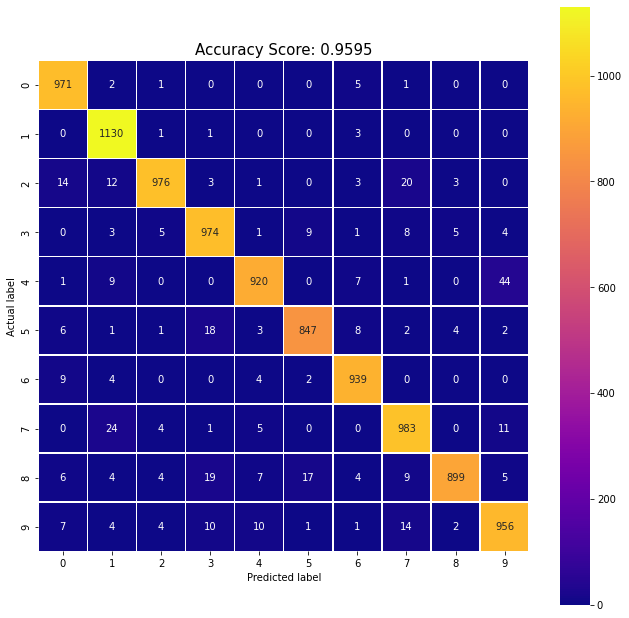

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(11,11))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'plasma');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show()

In [ ]:
k_list = list(range(1,50,2))
cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

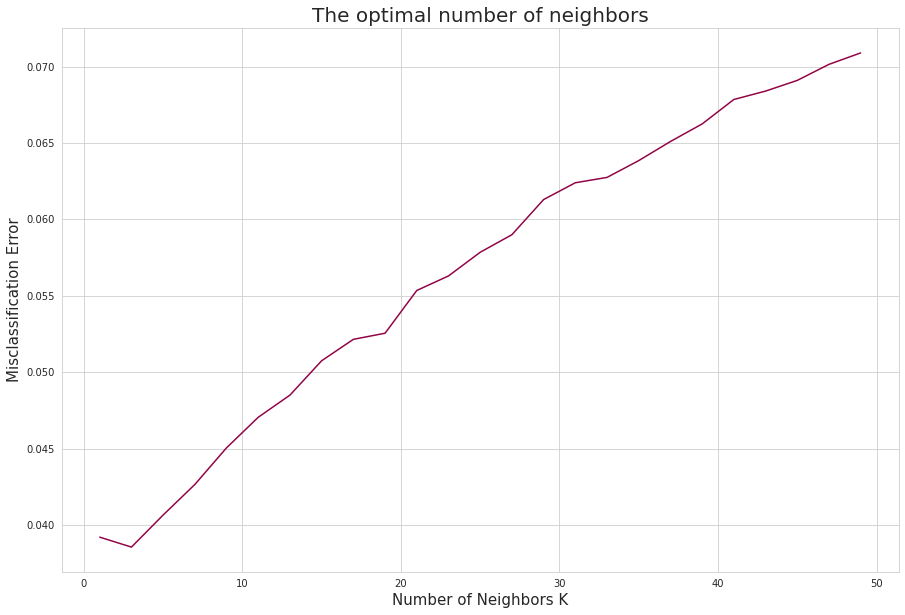

In [ ]:
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20)
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE, color="#910446")

plt.show()

In [ ]:
#%pip install mlxtend --upgrade
from mlxtend.evaluate.bias_variance_decomp import bias_variance_decomp

mse, bias, var = bias_variance_decomp(neigh, x_train, y_train, x_test, y_test, loss='mse', num_rounds=15, random_seed=1)


RANDOM FOREST CLASSIFIER
---



We are using sklearn to implement the random forest classifier for the MNIST dataset. The mnist_test.csv and mnist_train_small.csv are pre-included with jupyter notebooks, having 20,000 datapoints for training and 10,000 datapoints for testing. <br>
The following libraries are imported for the same - numpy and pandas deal with large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. scikit-learn provides the functions to implement several machine learning algorithms. This module allows us to directly import RandomForestClassifier. <br>

In [ ]:
clf = RandomForestClassifier(n_estimators=100,
                            max_depth=14)
clf.fit(x_train, y_train)
# Make predictions on entire test data
predictions = clf.predict(x_test)
score = clf.score(x_test, y_test)
print("Accuracy:", score*100)

Accuracy: 95.63000000000001


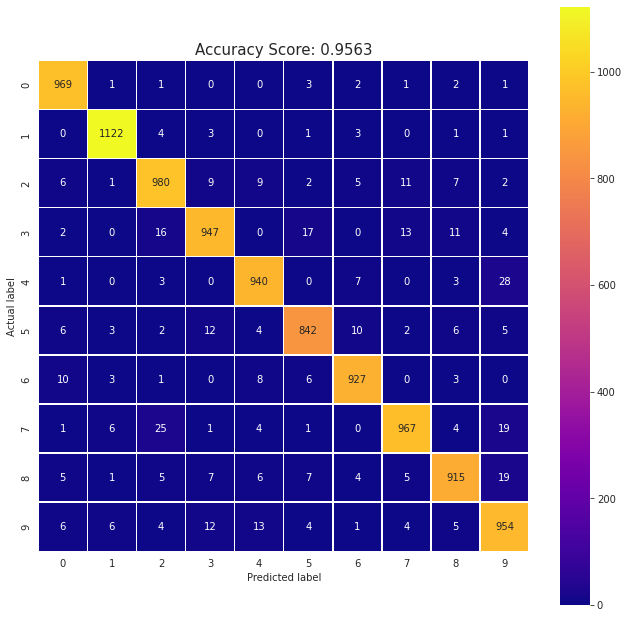

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(11,11))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'plasma');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show()

In [ ]:
print("Validation Confusion Matrix: \n" + str(cm))

Validation Confusion Matrix: 
[[ 969    1    1    0    0    3    2    1    2    1]
 [   0 1122    4    3    0    1    3    0    1    1]
 [   6    1  980    9    9    2    5   11    7    2]
 [   2    0   16  947    0   17    0   13   11    4]
 [   1    0    3    0  940    0    7    0    3   28]
 [   6    3    2   12    4  842   10    2    6    5]
 [  10    3    1    0    8    6  927    0    3    0]
 [   1    6   25    1    4    1    0  967    4   19]
 [   5    1    5    7    6    7    4    5  915   19]
 [   6    6    4   12   13    4    1    4    5  954]]


In [ ]:
#%pip install mlxtend --upgrade
from mlxtend.evaluate.bias_variance_decomp import bias_variance_decomp

mse, bias, var = bias_variance_decomp(clf, x_train, y_train, x_test, y_test, loss='mse', num_rounds=15, random_seed=1)

print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.871
Bias: 0.695
Variance: 0.177


Predicted 1


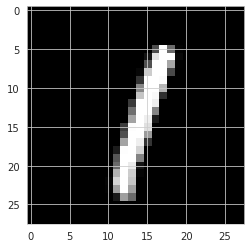

In [ ]:
#predict test data
prediction_test = clf.predict(x_test)

index=5
print("Predicted " + str(prediction_test[index]))
plt.imshow(x_test[index].reshape((28,28)),cmap='gray')